In [1]:
import pandas as pd
import numpy as np

## Load Data

Open the local file data, print the first 5 rows, & display the columns

In [2]:
data_df = pd.read_csv('credit_data_track2_part_2_1.csv')
data_df.head()

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,asnm,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted,gender
0,1,<0DM,6,Critical_acct_other_credits_existing,radio/television,1169.0,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,193,none,own,2,skilled_employee/official,1,yes,yes,0,male
1,2,0_to_200DM,48,Existing_credits_paid_till_now,radio/television,5951.0,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,424,none,own,1,skilled_employee/official,1,none,yes,1,female
2,3,None,12,Critical_acct_other_credits_existing,education,2096.0,<100DM,4_to_7yrs,2,male_single,...,73,none,own,1,unskilled_resident,2,none,yes,0,male
3,4,<0DM,42,Existing_credits_paid_till_now,furniture/equipment,7882.0,<100DM,4_to_7yrs,2,male_single,...,33,none,for_free,1,skilled_employee/official,2,none,yes,0,male
4,5,<0DM,24,Delay_in_past,new_car,4870.0,<100DM,1_to_4yrs,3,male_single,...,145,none,for_free,2,skilled_employee/official,2,none,yes,1,male


## Explore data

1. Check the data types of each columns

In [3]:
print(data_df.dtypes)

Unnamed: 0                  int64
checking_status            object
duration                    int64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment      int64
personal_status            object
other_parties              object
residence_since             int64
property_magnitude         object
age                         int64
asnm                        int64
other_payment_plans        object
housing                    object
existing_credits            int64
job                        object
num_dependents              int64
own_telephone              object
foreign_worker             object
accepted                    int64
gender                     object
dtype: object


2. Check if there is missing data

"None" or "none" in own_telephone, other_payment_plans, other_parties, checking_status are considered as valid data

In [4]:
print("\n","Sum of null values in each feature:","\n")
print(data_df.isnull().sum())


 Sum of null values in each feature: 

Unnamed: 0                0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             1
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
asnm                      0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
accepted                  0
gender                    0
dtype: int64


3. Check the unique values per column

In [5]:
for ctr, i in enumerate(data_df.columns):
    if ctr == 0:
        continue
    print("\n", ctr, i,"-",data_df[i].dtype,"\n")
    unq_col = data_df[i].unique().tolist()
    
    if data_df[i].dtypes == np.float or (data_df[i].dtypes == np.int and len(unq_col) > 10):
        print ("\t Min:",data_df[i].min(),", Avg:",data_df[i].mean(),", Max:", data_df[i].max())
    else:   
        for ctr1, j in enumerate(unq_col):
            print("\t",ctr1 + 1, j)
        


 1 checking_status - object 

	 1 <0DM
	 2 0_to_200DM
	 3 None
	 4 >200DM

 2 duration - int64 

	 Min: 4 , Avg: 20.903 , Max: 72

 3 credit_history - object 

	 1 Critical_acct_other_credits_existing
	 2 Existing_credits_paid_till_now
	 3 Delay_in_past
	 4 No_credits_taken_or_all_paid
	 5 All_credits_paid_duly

 4 purpose - object 

	 1 radio/television
	 2 education
	 3 furniture/equipment
	 4 new_car
	 5 used_car
	 6 business
	 7 domestic_appliances
	 8 repairs
	 9 other
	 10 retraining

 5 credit_amount - float64 

	 Min: 250.0 , Avg: 3273.2362362362364 , Max: 18424.0

 6 savings_status - object 

	 1 Unknown_or_no_savings_acct
	 2 <100DM
	 3 500_to_1000DM
	 4 >1000DM
	 5 100_to_500DM

 7 employment - object 

	 1 >7yrs
	 2 1_to_4yrs
	 3 4_to_7yrs
	 4 unemployed
	 5 <1yr

 8 installment_commitment - int64 

	 1 4
	 2 2
	 3 3
	 4 1

 9 personal_status - object 

	 1 male_single
	 2 female_divorced/separated/married
	 3 male_divorced/separated
	 4 male_married/widowed

 10 other_par

4. Determine the % of dependent variable

In [12]:
np.shape(data_df[data_df["accepted"] == 1])[0]

300

## Data wrangling

1. Simplify the credit_history clases<br/><br/>

><strong>A. Not fully paid</strong><br/>
Critical_acct_other_credits_existing<br/>
Delay_in_past<br/><br/>

><strong>B. Fully paid</strong><br/>
No_credits_taken_or_all_paid<br/>
All_credits_paid_duly<br/>
Existing_credits_paid_till_now<br/>

2. Limit the variables needed for analysis<br/><br/>

>A. Credit history<br/>
B. Existing Credits<br/>
C. Duration<br/>
D. Purpose<br/>
E. Credit Amount<br/>
F. Employment<br/>
G. Installments<br/>
H. Job<br/>
I. Housing<br/>
J. Age<br/>
K. Num of Dependents<br/>


In [6]:
# Simplify credit history classes
data_df['credit_history'][data_df['credit_history'].isin(['Critical_acct_other_credits_existing',\
                                        'Delay_in_past'])] = "Not fully paid"
data_df['credit_history'][data_df['credit_history'].isin(['No_credits_taken_or_all_paid',\
                                        'All_credits_paid_duly',\
                                        'Existing_credits_paid_till_now'])] = "Fully paid" 


/Users/rnacario/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rnacario/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Limit the variables needed for analysis
data_df = data_df[['checking_status','savings_status','credit_history','existing_credits','duration','purpose',\
                   'credit_amount','employment','installment_commitment','job',\
                   'housing','age','num_dependents','accepted']]
data_df.head()

,checking_status,savings_status,credit_history,existing_credits,duration,purpose,credit_amount,employment,installment_commitment,job,housing,age,num_dependents,accepted
0,<0DM,Unknown_or_no_savings_acct,Not fully paid,2,6,radio/television,1169.0,>7yrs,4,skilled_employee/official,own,35,1,0
1,0_to_200DM,<100DM,Fully paid,1,48,radio/television,5951.0,1_to_4yrs,2,skilled_employee/official,own,22,1,1
2,None,<100DM,Not fully paid,1,12,education,2096.0,4_to_7yrs,2,unskilled_resident,own,49,2,0
3,<0DM,<100DM,Fully paid,1,42,furniture/equipment,7882.0,4_to_7yrs,2,skilled_employee/official,for_free,45,2,0
4,<0DM,<100DM,Not fully paid,2,24,new_car,4870.0,1_to_4yrs,3,skilled_employee/official,for_free,53,2,1


3. Transfrom categorical values to numeric

In [8]:
from sklearn import preprocessing

def transform_categories_to_numeric(categories):
    le = preprocessing.LabelEncoder()
    le.fit(categories)
    return le

le_checking_status = transform_categories_to_numeric(data_df['checking_status'])
data_df['checking_status'] = le_checking_status.transform(data_df['checking_status'])

le_savings_status = transform_categories_to_numeric(data_df['savings_status'])
data_df['savings_status'] = le_savings_status.transform(data_df['savings_status'])
    
le_credit_history = transform_categories_to_numeric(["Fully paid", "Not fully paid"])
data_df['credit_history'] = le_credit_history.transform(data_df['credit_history']) 

le_purpose = transform_categories_to_numeric(data_df['purpose'])
data_df['purpose'] = le_purpose.transform(data_df['purpose']) 

le_employment = transform_categories_to_numeric(data_df['employment'])
data_df['employment'] = le_employment.transform(data_df['employment']) 

le_job = transform_categories_to_numeric(data_df['job'])
data_df['job'] = le_job.transform(data_df['job']) 
                                                        
le_housing = transform_categories_to_numeric(data_df['housing'])
data_df['housing'] = le_housing.transform(data_df['housing'])                                                        


In [9]:
data_df.head()

,checking_status,savings_status,credit_history,existing_credits,duration,purpose,credit_amount,employment,installment_commitment,job,housing,age,num_dependents,accepted
0,1,4,1,2,6,6,1169.0,3,4,1,1,35,1,0
1,0,2,0,1,48,6,5951.0,0,2,1,1,22,1,1
2,3,2,1,1,12,2,2096.0,1,2,3,1,49,2,0
3,1,2,0,1,42,3,7882.0,1,2,1,0,45,2,0
4,1,2,1,2,24,4,4870.0,0,3,1,0,53,2,1


3. Plot correlation

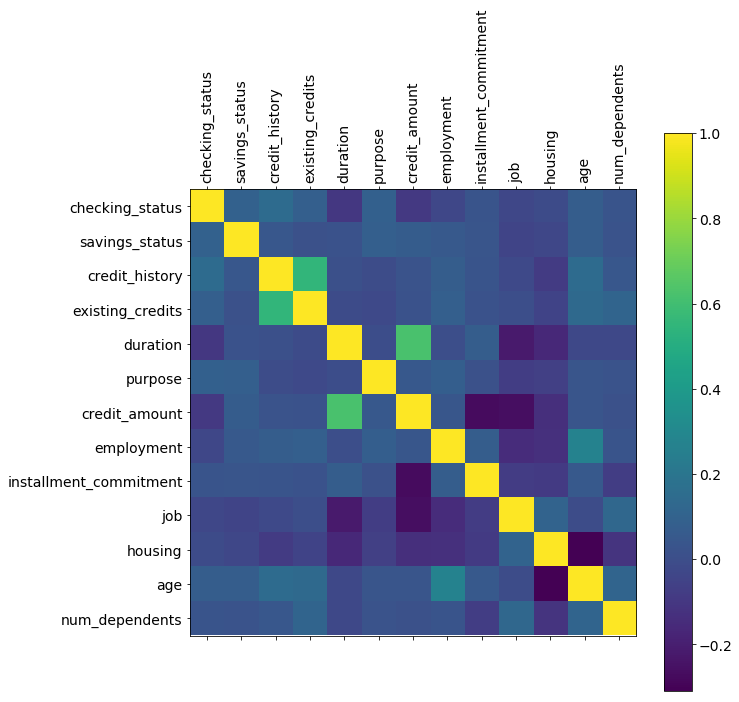

In [22]:
data_df_X = data_df[['checking_status','savings_status','credit_history','existing_credits','duration','purpose',\
                   'credit_amount','employment','installment_commitment','job',\
                   'housing','age','num_dependents']]
import matplotlib.pyplot as plt
%matplotlib inline


f = plt.figure(figsize=(10, 10))
plt.matshow(data_df_X.corr(), fignum=f.number)
plt.xticks(range(data_df_X.shape[1]), data_df_X.columns, fontsize=14, rotation=90)
plt.yticks(range(data_df_X.shape[1]), data_df_X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

Observation:
>1. Credit history is positively correlated to existing credits.
2. Credit amount is positively correlated to duration.
3. Credit amount is negatively correlated with installment commitment.


4. Center and scale the data